# Hands-on 06: Transição analógico/digital (amostragem, reconstrução ideal, quantização, codificação PCM e multiplexação TDM) 


# Objetivos
As metas desse tutorial são ajudar o usuário a:
- Fazer uma breve revisão sobre o processo de digitalização de um sinal contínuo (amostragem, quantização, codificação, reconstrução);
- Fazer uma breve revisão sobre o processo de no tempo;
- Praticar os conceitos com protótipos em Matlab e Python.

# _Pulse Code Modulation_ (PCM) 

Uma forma prática de exemplificar a digitalização de um sinal contínuo é entender as operações relacionadas com o _Pulse Code Modulation_ (PCM). O PCM é uma técnica de codificação por forma de onda (modulação em banda-base) que transforma um sinal contínuo (caracterizados por sua amplitude poder assumir qualquer valor num intervalo de tempo contínuo) em um onda digital (sequências de zeros e uns representados por uma forma de onda discreta em amplitude e contínua no tempo). Para a obtenção da onda PCM, o sinal contínuo passa por algumas etapas de processamento, entre elas:
- **Filtragem passa-baixa :** O grande objetivo aqui é limitar a largura de banda do sinal em banda-base para evitar problemas de sobreposição espectral nas demais etapas do processo;
- **Amostragem:** Sua função é transformar o sinal de tempo contínuo em sinal discreto no tempo;
- **Quantização:** Sua razão de ser é transformar o sinal amostrado e analógico em um sinal discreto também em amplitude, ao atribuir níveis finitos de amplitude que o sinal poderá assumir. Ao final dessa etapa obtém-se um sinal com um número finito de amostras (discretas no tempo pela amostragem) e com cada amostra sendo representada por um nível discreto de amplitude (quantizadas). Assim, por meio da amostragem e quantização, o sinal que era contínuo em tempo e amplitude (uma função com domínio e imagem pertencentes ao $\mathbb{R}$) passa a ser representado por uma função com domínio e imagem pertencentes ao $\mathbb{N}$;
- ** Codificador:** Aqui ocorre a transformação de uma onda como sinal elétrico em uma onda digital (sequência de zeros e uns). Uma maneira clássica de realizar essa etapa é representar cada nível de amplitude quantizada em uma sequência de bits (muitas vezes de maniera igualitária). Para tal, vale a relação:
$$n = log_2(L) \Leftrightarrow  L = 2^n,$$
sendo $L$ o número de níveis de amplitude da quantização e $n$ o número de bits que representa cada nível;

- Modulação em banda-base ou codificação de linha: De posse da sequência de zeros e uns que representa sinal contínuo, essa operação atribuiu uma forma de pulso a cada bit (ou a um conjunto de bits, no caso de modulação multi-nível), resultando em um sinal discreto em amplitude (existe um conjunto finito de formas de pulsos) e contínuo no tempo. O exemplo mais direto da codificação de linha é usar um pulso quadrado positivo para representar o bit 1 e um pulso quadrado negativo para representar o bit 0. 

A digitalização promove algumas vantagens em relação à comunicação analógica:
- Um sinal digital é capaz de ser transmitido em um meio de comunicação com maior nível de ruído e distorções do que um sinal analógico (dentro de certos limites), aumentando sua confiabilidade. Ou seja, sinal quantizado por mais que o ruído perturbe a natureza da onda, seus valores de amplitudes são pré-definidos sendo possível recuperar o sinal original por meio de regeneração do pulso. Na comunicação analógica, isso é dificultado, pois a forma da onda precisaria ser regenerada (e claro, ela não é conhecida na transmissão analógica). Isso possibilita o uso de regeneradores de sinal em uma comunicação ponto a ponto com um controle bem fino da taxa de erro;
- Maior facilidade na multiplexação de sinais, resultando em maior eficiência;
- Maior facilidade no armazenamento em relação aos sinais analógicos, tanto por razões físicas quanto por facilidade de usar codificadores de fonte (compressores e compactadores). A codificação de fonte também é responsável por um grande aumento de eficiência na transmissão da informação;
- Maior facilidade de implementar estratégias de segurança da informação;
- Maior facilidade de manipular (armezenar e transmitir) informação com alta qualidade (e.g. imagem e vídeo em alta definição, áudio com alta fidelidade, grande quantidade de dados com baixo erro).

# Prática 1: Amostragem (visualização no tempo e na frequência)

A primeira etapa da modulação PCM é a amostragem, um processo completamente reversível, que pode ser desfeito sem perdas. Isso significa o conjunto de amostras pode ser usado para reconstruir completamente o sinal contínuo. Para que isso ocorra, o processo de amostragem **deve** obedecer algumas regras. A primeira delas é estabelecida pelo teorema de Nyquist: dado um sinal contínuo $m(t)$ com largura de banda $B$, desde que a frequência de amostragem seja maior que dobro da largura de banda ($f_{s}$ > 2B) é possível recuperar o sinal perfeitamente a partir do sinal amostrado. Uma segunda, mais não menos importante, regra é que o sinal amostrado seja limitado em banda.

Como já foi tema de práticas anteriores, essas regras devem ser obedecida para evitar o _aliasing_ (mascaramento), que nada mais é que a sobreposição das cópias espectrais resultantes do processo de amostragem. Nesta prática, veremos esse efeito em um sinal senoidal.

O código a seguir mostra a maneira genérica de gerar um sinal senoidal no Matlab. Dessa maneira, dependedo do referencial temporal, podemos modelar um sinal contínuo no tempo (taxa amostragem alta). Contudo, isso é somente um modelo, pois, na realidade, todos os sinais em um computador são discretos.

In [ ]:
Ts = 0.02;
t = 0:Ts:2;
m = sin(2*pi*2*t);
subplot(2,1,1);
stem(t,m,'.');
subplot(2,1,2);
plot(t,m,'r');
xlabel('Tempo [s]');

Note que o sinal (vetor _m_) construído acima não é contínuo no tempo, mas discreto. Contudo, depedendo da maneira que o sinal é mostrado (função **stem** ou função **plot**), sua visualização no domínio do tempo é diferente.  Isso ocorre porque a função **plot** liga os pontos do vetor por meio de retas, dando a visualização de um sinal contínuo. Contudo, a amostra em $t$ = 0.01, simplesmente, não existe, pois o eixo temporal foi construído em passos de 0.02. Outra faceta dessa representação é que existe uma diferença clara no tratamento do sinal quando as amostras faltantes não existem ou quando são iguais a zero. Vamos mostrar esse comportamente logo a seguir.

Como já praticado em outros experimentos, para escrever esse código no Python precisamos das bibliotecas **Numpy** e **Matplotlib**.

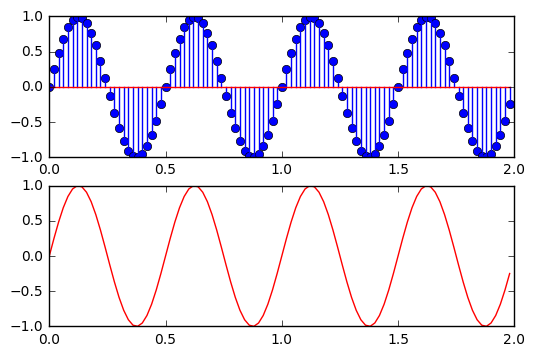

In [6]:
import numpy as np
from matplotlib import pyplot as plt
Ts = 0.02
t = np.arange(0,2,Ts)
x = np.sin(t*2*np.pi*2)
plt.subplot(211)
plt.stem(t,x)
plt.subplot(212)
plt.plot(t,x,'r')
plt.show()

## Subamostragem e Sobreamostragem

Duas operações bem importantes relacionadas a amostragem são a subamostragem e sobre amostragem. Sem se deter ao processo matemático envolvido nessas duas operações, iremos exemplificar como elas funcionam. 

Um uso comum da subamostragem e da sobreamostragem é a adequação no ritmo das amostras (taxa de amostragem) em um cadeia de processamento digital de sinais que envolva hardwares diferentes. Podemos ter situações que hardwares com diferentes capacidades de processamento tenham que, ao trabalharem em conjunto no mesmo sinal, realizar mudanças de taxa de amostragem para adequar o envio/recebimento de amostras no ritmo que eles consigam trabalhar. Um exemplo cotidiano é o uso da placa de som do nosso computador. Geralmente elas trabalharam com taxa de amostragem de 44,1 kHz, e precisam que os softwares que a usam mandem amostras nesse ritmo. Caso isso não seja feito, ouviremos um som muito acelerado ou lento.

Outro exemplo é a recepção em um receptor sem fio. O sinal é recebido em alta frequência (alta taxa de amostragem), mas quando demodulado, o sinal em banda-base sofrerá um _downsample_ para que todo o processamento digital de sinais (e.g. codificação de canal) seja feito com menor taxa de amostragem. Isso exige processar menos amostras, resultando em menos consumo computacional e economia de energia.

A função **downsample** do Matlab coleta amostras em um intervalo de _N_ elementos, especificado como parâmetro.

In [1]:
N = 10;
x=0:1:100;                                          % Vetor com número inteiros de 0 à 100, de 1 em 1
y= downsample(x,N);                                 % Coleta 1 elemento a cada 10 elementos do vetor
disp(y);

     0    10    20    30    40    50    60    70    80    90   100



Na biblioteca **Numpy** do Python, existe a função **resample**, que retorna um resultado semelhante ao necessário, mas os parâmetros não são tão intuitivos como o do Matlab. Por isso, usaremos a própria sintaxe do Python para indexar o vetor e obter os valores que queremos:

In [2]:
import numpy as np
x = np.linspace(0,100,101)
N = 10
y = x[::N]
print(y)

[   0.   10.   20.   30.   40.   50.   60.   70.   80.   90.  100.]


Similarmente, a função **upsample** do Matlab aumenta o vetor preenchendo com zeros (_N - 1_) elementos entre as amostras do vetor de entrada.

In [4]:
x=1:1:10;                                            
N = 3;
y = upsample(x,N);                                         
disp(y);

  Columns 1 through 13

     1     0     0     2     0     0     3     0     0     4     0     0     5

  Columns 14 through 26

     0     0     6     0     0     7     0     0     8     0     0     9     0

  Columns 27 through 30

     0    10     0     0



In [ ]:
Já no Python, podemos implementar a função como:

In [10]:
import numpy as np

# Criação das funções, por questão de organização
def downsample(array,rate):
    return array[::rate]

def upsample(array,rate):
    from numpy import zeros
    ret =  zeros(rate*len(array))
    ret[::rate] = array 
    return ret

xu = np.linspace(1,10,10)
xd = np.linspace(0,100,101)
Nd = 10
Nu = 3
yu = upsample(xu,Nu);
yd = downsample(xd,Nd);
print("Upsample:")
print(yu)
print("Donwsample:")
print(yd)

Upsample:
[  1.   0.   0.   2.   0.   0.   3.   0.   0.   4.   0.   0.   5.   0.   0.
   6.   0.   0.   7.   0.   0.   8.   0.   0.   9.   0.   0.  10.   0.   0.]
Donwsample:
[   0.   10.   20.   30.   40.   50.   60.   70.   80.   90.  100.]


**Passo 01:** Abra um script no Matlab, salve-o como **handson5_1.m** e escreva o seguinte código:

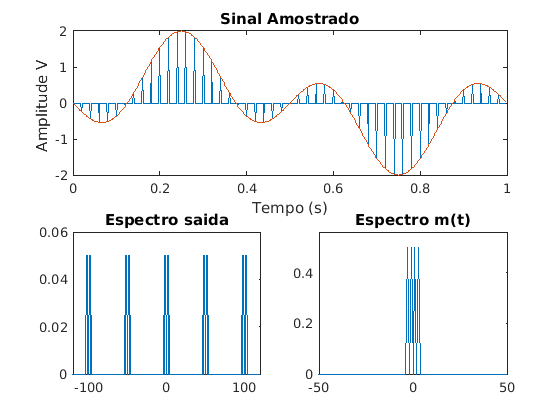

In [7]:
% Amostragem.m
close all; clear all; clc;
%% Parâmetros
T=0.002;                                                % Taxa de amostragem (500kHz)
Tf=1;                                                   % Tempo final em segundos
t=0:T:Tf-T;                                             % Definição do eixo do tempo      
fm1=3;                                                  % Frequência senoide 1      
fm2=1;                                                  % Frequência senoide 2
m_t=sin(2*pi*fm2*t)-sin(2*pi*fm1*t);                    % Sinal mensagem m(t)
ts=0.02;                                                % Nova taxa de amostragem
N_samp=round(ts/T);                                     % Número de elementos 
L=16;                                                   % Níveis de quantização
% T/ts deve inteiro, caso contrário, não funcionará a amostragem.

%% Amostragem 
s_out=downsample(m_t,N_samp);                           % Coleta 1 amostra a cada N_samp=10 amostras do sinal  
s_out=upsample(s_out,N_samp);                           % Retorna vetor amostrado com o numero inicial de elementos

%% Espectro
lfft=length(m_t);                                       % Comprimento da fft
M_f=fftshift(fft(m_t,lfft)/lfft);                       % Sinal m_t na frequência 
S_out=fftshift(fft(s_out,lfft)/lfft);                   % Sinal s_out na frequência
Fs=1/T;
freq=-Fs/2:Fs/lfft:Fs/2-Fs/lfft;
%% Plotting
% Plot do sinal no tempo
subplot(2,2,[1 2])
plot(t,s_out)
hold on
plot(t,m_t)
title('Sinal Amostrado');
xlabel('Tempo (s)');
ylabel('Amplitude V ');

% Plot do sinal na frequência
subplot(2,2,3)
plot(freq,abs(S_out))
title('Espectro saida');
axis([-120 120 0 0.06])
subplot(2,2,4)
plot(freq,abs(M_f))
title('Espectro m(t)');
axis([-50 50 0 0.56])

%% Salvando variáveis 
% filename = 'Amostragem.mat';
% save(filename)

Perceba que o sinal resultante é do tipo PAM (Pulse Amplitude Modulation) cujos pulsos são extremamente estreitos.

- **Se antes estávamos fazendo amostragem de um sinal qualquer $m(t)$ e não aparecia frequências laterais, então de onde surgiu essas frequências???**

Simples! A amostragem antes era feita em um vetor de tempo $t$ onde todo elemento de $t$ tinha uma amostra de $m(t)$. Nessa amostragem, como queremos simular a amostragem real. Se $t$ fosse contínuo de verdade, nem todo elemento teria amostras de $m(t)$. De forma mais clara, antes apenas amostrávamos o sinal, agora amostramos o sinal e voltamos para zero em todos os outros elementos de $t$ simulando as regiões que não ocorreu a amostragem de verdade.

### Visualização do sinal no tempo e frequência para várias taxas de amostragem (teorema de Nyquist):

A amostragem ocorre como a multiplicação de trem de pulsos em pontos definidos formando no eixo da frequência o surgimento de frequências laterais. Quando tem-se uma frequência de amostragem menor que duas vezes a frequência máxima $F_{s}\leq 2f_{m}$, ocorre a sobreposição entre essas frequências, tornando o sinal resultante impossível de ser reconstruído. Porém, quanto maior a frequência de amostragem, mais "longe" ela fica da frequência em banda base, podendo ser reconstruído o sinal perfeitamente sem distorção para qualquer valor maior que a taxa de Nyquist. Por questão de custos, costuma-se assumir a frequência de amostragem como $F_{s}\approx2.2f_{m}$.

Devemos também levar em conta que, seja m(t) um sinal com frequência de 25Hz com 1000 amostras e frequência de amostragem de 500Hz, quando amostramos o sinal retornando a zero pulando 10 elementos é como se a frequência de amostragem fosse de 10x menor que a frequência real. Isso provoca uma mudança séria na hora da amostragem, pois a frequência mínima agora de amostragem será 50 Hz. Faremos então no script:

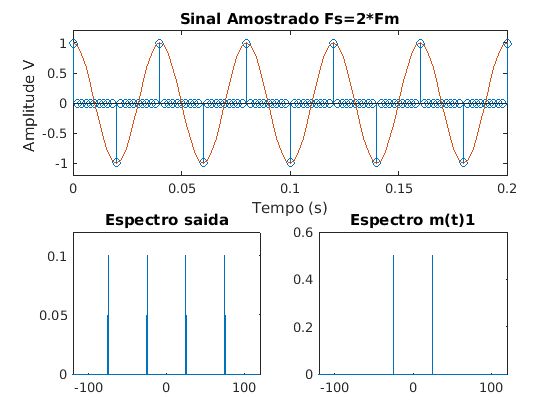

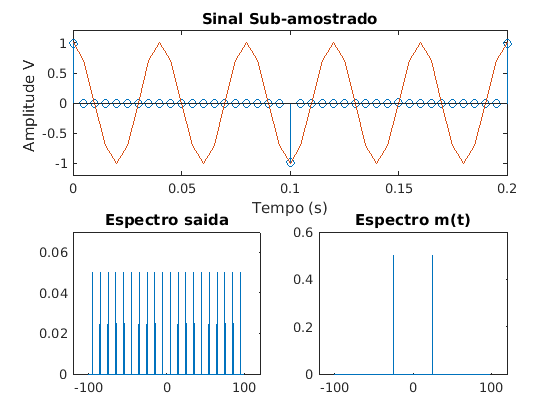

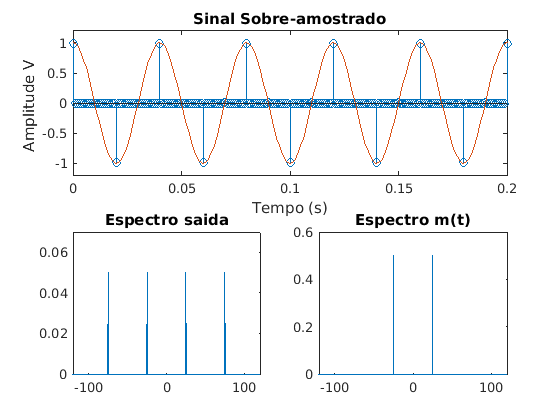

In [1]:
% Amostragem_Nyquist.m
close all; clear all; clc;
%% Parâmetros
% Nessa simulação faremos 
% 1- Fs = 2*Fm - Sinal amostrado na frequencia mínima
% 2- Fs > 2*Fm - Sinal Sub-amostrado
% 3- Fs < 2*Fm - Sinal Sobre-amostrado
% Amostragem
Tf=2;                                                   % Tempo final em segundos
% Eixo do tempo 1
Fs1=500;                                                % Frequência de amostragem   -- 1
t1=0:1/Fs1:Tf-1/Fs1;                                    % Definição do eixo do tempo -- 1
% Eixo do tempo 2
Fs2=200;                                                % Frequência de amostragem   -- 2
t2=0:1/Fs2:Tf-1/Fs2;                                    % Definição do eixo do tempo -- 2
% Eixo do tempo 3
Fs3=1000;                                               % Frequência de amostragem   -- 3
t3=0:1/Fs3:Tf-1/Fs3;                                    % Definição do eixo do tempo -- 3
% Senoide
fm=25;                                                  % Frequência senoide
m_t1=cos(2*pi*fm*t1);                                   % Sinal mensagem m1(t)
m_t2=cos(2*pi*fm*t2);                                   % Sinal mensagem m2(t)
m_t3=cos(2*pi*fm*t3);                                   % Sinal mensagem m3(t)
n=10;                                                   % Número de elementos pulados
% T/ts deve ter resto = 0, caso contrário, não funcionará.

%% Amostragem 
% Amostragem 1
s_out1=downsample(m_t1,n);                              % Pula N_samp=10 amostras do vetor s_out    
s_out1=upsample(s_out1,n);                              % Retorna vetor amostrado com o numero inicial de elementos
%s_out=min(m_t,t1);
% Amostragem 2
s_out2=downsample(m_t2,n);                              % Pula N_samp=10 amostras do vetor s_out    
s_out2=upsample(s_out2,n);                              % Retorna vetor amostrado com o numero inicial de elementos
% Amostragem 1
s_out3=downsample(m_t3,n);                              % Pula N_samp=10 amostras do vetor s_out    
s_out3=upsample(s_out3,n);                              % Retorna vetor amostrado com o numero inicial de elementos

%% Espectro da frequência
% Eixo da frequência 1
lfft1=length(m_t1);                                     % Comprimento da fft
M_f1=fftshift(fft(m_t1,lfft1)/lfft1);                   % Sinal m_t na frequência 
S_out1=fftshift(fft(s_out1,lfft1)/lfft1);               % Sinal s_out na frequência
freq1=-Fs1/2:Fs1/lfft1:Fs1/2-Fs1/lfft1;                 % Eixo da Frequência
% Eixo da frequência 2
lfft2=length(m_t2);                                     % Comprimento da fft
M_f2=fftshift(fft(m_t2,lfft2)/lfft2);                   % Sinal m_t na frequência 
S_out2=fftshift(fft(s_out2,lfft2)/lfft2);               % Sinal s_out na frequência
freq2=-Fs2/2:Fs2/lfft2:Fs2/2-Fs2/lfft2;                 % Eixo da Frequência
% Eixo da frequência 3
lfft3=length(m_t3);                                     % Comprimento da fft
M_f3=fftshift(fft(m_t3,lfft3)/lfft3);                   % Sinal m_t na frequência 
S_out3=fftshift(fft(s_out3,lfft3)/lfft3);               % Sinal s_out na frequência
freq3=-Fs3/2:Fs3/lfft3:Fs3/2-Fs3/lfft3;                 % Eixo da Frequência


%% Plotting
% Plot do sinal no tempo 3
subplot(2,2,[1 2])
stem(t3,s_out3)
axis([0 0.2 -1.2 1.2])
hold on
plot(t3,m_t3)
title('Sinal Sobre-amostrado');xlabel('Tempo (s)');ylabel('Amplitude V ');

% Plot dos sinais na frequência
subplot(2,2,3)
plot(freq3,abs(S_out3))
title('Espectro saida');
axis([-120 120 0 0.07])
subplot(2,2,4)
plot(freq3,abs(M_f3))
title('Espectro m(t)');
axis([-120 120 0 0.6])
figure
% -------------------------------------

% Plot do sinal no tempo 2 -Sub-amostrado
subplot(2,2,[1 2])
stem(t2,s_out2)
axis([0 0.2 -1.2 1.2])
hold on
plot(t2,m_t2)
title('Sinal Sub-amostrado');xlabel('Tempo (s)');ylabel('Amplitude V ');

% Plot dos sinais na frequência
subplot(2,2,3)
plot(freq2,abs(S_out2))
title('Espectro saida');
axis([-120 120 0 0.07])
subplot(2,2,4)
plot(freq2,abs(M_f2))
title('Espectro m(t)');
axis([-120 120 0 0.6])
figure
% -------------------------------------

% Plot do sinal no tempo 1
subplot(2,2,[1 2])
stem(t1,s_out1)
axis([0 0.2 -1.2 1.2])
hold on
plot(t1,m_t1)
title('Sinal Amostrado Fs=2*Fm');xlabel('Tempo (s)');ylabel('Amplitude V ');

% Plot dos sinais na frequência
subplot(2,2,3)
plot(freq1,abs(S_out1))
title('Espectro saida');
axis([-120 120 0 0.12])
subplot(2,2,4)
plot(freq1,abs(M_f1))
title('Espectro m(t)1');
axis([-120 120 0 0.6])


### Reconstrução ideal do sinal amostrado para várias taxas de Nyquist 
Para entender como funciona o processo de reconstrução de um sinal $m(t)$ qualquer, é necessário estar claro:
- **Filtros:**
Filtrar frequências indesejadas em um sinal amostrado torna-se bastante simples quando pensamos em um filtro passa baixa, cuja banda é exatamente a frequêcia que queremos filtrar (com uma certa margem). Entende-se como filtro uma janela (retângulo, degrau, ...) na frequência com largura de banda determinada. Esses filtros quando passado para o domínio do tempo, obtêm-se sinais do tipo sinc() que nada mais é que:
$$ sinc(x)=\frac{sen(x)}{x}$$

Isso significa que se convoluirmos o sinal $sinc()$ com os argumentos corretos de banda, com o sinal amostrado obteremos novamente o sinal inicial.

- **Convolução:**  
Mede a área subentendida pela superposição de dois sinais em função do deslocamento existente entre eles.
$$ w(k)=u(j)*v(j)=\sum_{j}^{} u(j)\cdot v(k-j+1)$$
De tal forma que, se n = length(u) e m = length(v), w é um vetor de comprimento length(w)=m+n-1.

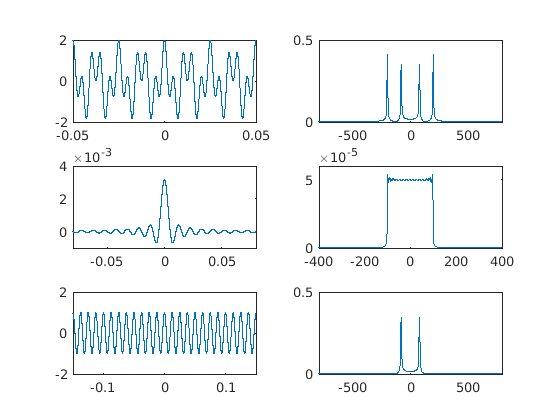

In [9]:
% Filtro.m
clear all;clc;close all;
%% Parâmetros da Sinc
B=100;                                                      % Banda do filtro
Ts=1/(200*pi*B);                                            % Taxa de geração (Passo no tempo)
Fs=1/Ts;                                                    % Frequência de amostragem
N=10000;                                                    % Número de amostras
tf=N*Ts;                                                    % Tempo final
t=-tf:Ts:tf;                                                % Eixo do tempo
Am=2*Ts*B;                                                  % Amplitude do sinal
s= Am*sinc(2*B*t);                                          % Sinc 
m=cos(2*pi*200*t)+cos(2*pi*80*t);                           % Sinal m(t)

%% Convolução
c=conv(s,m);                                                % Calcula a convolução
c=c(1,(length(t)-1)/2:3*(length(t)-1)/2);                   % Ajusta o tamanho do vetor (/2)
    
%% Espectros de frequência
lfft=length(s);                                             % Comprimento da FFT
S=fftshift(fft(s,lfft)/lfft);                               % Sinc S(f)
M=fftshift(fft(m,lfft)/lfft);                               % Sinal M(f) 
C=fftshift(fft(c,lfft)/lfft);                               % Sinal M(f) 
freq= -Fs/2:Fs/lfft:Fs/2-Fs/lfft;                           % Eixo da frequência

%% Plotting 
% Plot do Sinal no tempo
subplot(3,2,1)                                      
plot(t,m)                  
axis([-0.05 0.05 -2 2])
% Plot do Sinal na frequência                   
subplot(3,2,2)                                      
plot(freq,abs(M))        
axis([-800 800 0 0.5])
%------------------------------------
% Plot do Sinc no tempo
subplot(3,2,3)                                      
plot(t,s)    
axis([-0.08 0.08 -1e-3 4e-3])
% Plot do Sinc na frequência                   
subplot(3,2,4)                                      
plot(freq,abs(S))       
axis([-400 400 0 6e-5])
%------------------------------------
% Plot da convolução no tempo                                
subplot(3,2,5)
plot(t,c)      
axis([-0.15 0.15 -2 2])
% Plot da convolução na frequência   
subplot(3,2,6)
plot(freq,abs(C))
axis([-800 800 0 0.5])

Conhecido o método de filtragem, agora faremos sua aplicação para sinais amostrados. Realizar a filtragem do sinal original e transformar em um sinal contínuo no tempo novamente requer a filtragem de suas componentes laterais. Um filtro ideal (ou muito próximo) $H(f)$ pode ser entendido como um retângulo na frequência que quando multiplicado com o sinal $M(f)$ terá componentes de frequência apenas onde o filtro for diferente de zero. Logo, convoluindo um filtro no tempo com um sinal $m(t)$ qualquer, espera-se que seja filtrado as frequências além da banda do filtro. Faremos então a filtragem de um sinal pela convolução com uma sinc() (Filtro).

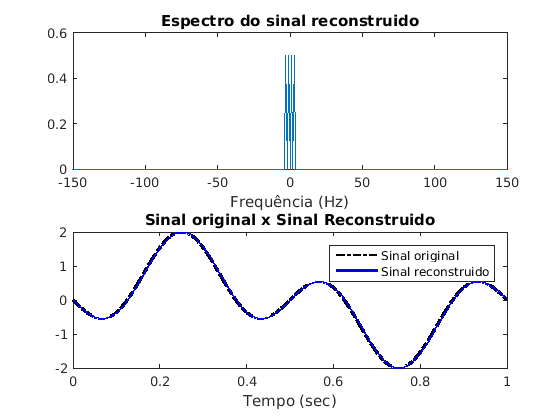

In [2]:
% Reconstrucao_FPB
clc; clear all; close all;
%% Parâmetros 
% Coletaremos todos os dados do processo de quantização e amostragem para 
% que o código não fique extenso. Todas as variáveis terão o mesmo nome.
% O arquivo .mat deve sempre está na pasta em que o script está.
load('handsOn7_matlab_codes/Amostragem.mat')

%% Reconstrução via filtro passa baixa
% Largura máxima de banda do filtro é dada por Bw = floor((lfft/N_samp)/2);
Fmax=1/(2*T);                                                   % Frequência máxima dada por Fs/2
BW=10;                                                          % Largura de banda de 10

% Filtro
H_lpf=zeros(1,lfft);                                            % Zera vetor filtro
H_lpf(lfft/2-BW:lfft/2+BW-1)=1;                                 % Define 1 na frequencia desejada
S_recv=N_samp*S_out.*H_lpf;                                     % Filtragem ideal
s_recv=real(ifft(fftshift(S_recv)));                            % Reconstroi o sinal no tempo
s_recv=s_recv(1:lfft);                                          % Corrige numero de elementos 
s_recv=s_recv*(max(m_t)/max(s_recv));                           % Dá ganho pro sinal reconstruido

%% Plotting
% Plota o sinal reconstruído por um filtro passa baixa ideal no domínio da frequência

% Plota sinal recuperado na frequência
subplot(2, 1, 1);
sfig2a=plot(freq,abs(S_recv));
xlabel('Frequência (Hz)');
axis([-150 150 0 .6]);
title('Espectro do sinal reconstruido');

% Plota sinal recuperado no tempo
subplot(2, 1, 2);
sfig2b=plot(t,m_t,'k-.',t,s_recv(1:lfft),'b');
legend('Sinal original','Sinal reconstruido');
xlabel('Tempo (sec)');
title('Sinal original x Sinal Reconstruido');
set(sfig2b,'Linewidth',2);


A outra forma de reconstruir um sinal é pelo somatório de sincs (Convolução)

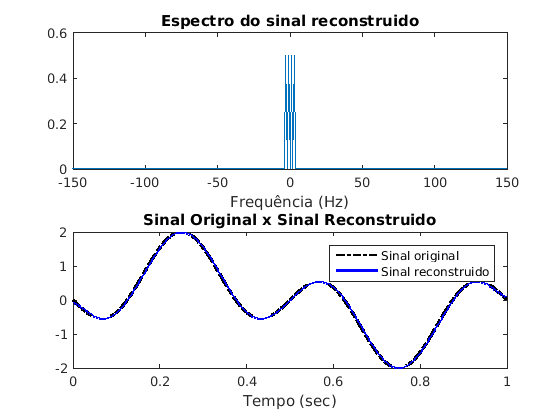

In [6]:
% Reconstrucao_sinc.m
close all; clear all; clc;
%% Parâmetros
% Coletaremos todos os dados do processo de amostragem para que o código
% não fique extenso. Todas as variáveis terão o mesmo nome. O arquivo .mat
% deve sempre está na pasta em que o script está.
load('handsOn7_matlab_codes/Amostragem.mat')

%% Reconstrução via Sincs
nSamples = length(s_out);                                        % Mede-se o comprimento do sinal
xSamples = 0 : nSamples-1;                                       % Vetor ordenado de amostras
trec = nSamples/Tf*[0:T:Tf];                                     % Eixo do tempo do sinal recuperado
Tsinc = 0.002;                                                   % Passo de tempo da sinc
Tfsinc = 50;                                                     % Tempo Final da sinc
tsinc = 0:Tsinc:Tfsinc;                                          % Eixo de tempo da sinc
s_recv=0;                                                        % Cria o vetor da reconstrução
Bs = fm1;                                                        % Banda da transmissão

% Gera laço para somatório
for ik = xSamples      
Nx_sinc = s_out(ik+1)*sinc(2*pi*Bs*(tsinc-ik*T));                % Cria sinc para a amostra ik
s_recv = s_recv+Nx_sinc;                                         % Faz somatórios das sincs
end
s_recv=s_recv(1:lfft);                                           % Corrige comprimento do vetor
s_recv=s_recv*(max(m_t)/max(s_recv));                            % Ajusta o ganho

%% Plotting
% Plota o sinal reconstruído por um Sincs no domínio do tempo
% Plota sinal recuperado na frequência
S_recv=fftshift(fft(s_recv,lfft)/lfft);
subplot(2, 1, 1);
sfig2a=plot(freq,abs(S_recv));
xlabel('Frequência (Hz)');
axis([-150 150 0 .6]);
title('Espectro do sinal reconstruido');

% Plota sinal recuperado no tempo
subplot(2, 1, 2);
sfig2b=plot(t,m_t,'k-.',t,s_recv(1:lfft),'b');
legend('Sinal original','Sinal reconstruido');
xlabel('Tempo (sec)');
title('Sinal Original x Sinal Reconstruido');
set(sfig2b,'Linewidth',2);

### Quantização: parâmetros, erro de quantização e qualidade:

Na quantização, limitamos a amplitude do sinal de mensagem em ($-m_{p},m_{p}$) e qualquer amostra qualquer de $m(t)$ é aproximada ao nível de quantização mais próximo dela. Nota-se também que $m_{p}$ não é necessariamente a amplitude de pico do sinal e as amplitudes que ultrapassarem este pico são truncadas. Portanto, conclui-se que $m_{p}$ não é um parâmetro da onda e sim do quantizador. Conhecido o intervalo ($-m_{p},m_{p}$), divide por $L$ níveis uniformemente espaçados sendo cada um $\Delta_{v}=\frac{2m_{p}}{L}$.
Do ponto de vista prático, um sinal digital que pode ser representado em um número binário limitado é desejável devido a facilidade de implementação, sua simplicidade e melhor discriminação de ruido.

No script abaixo é mostrado cada etapa para quantizar um sinal $x(t)$ usando a função round() que retorna o número inteiro mais próximo. Obs: Quantização Linear (Sem distorcer amplitude); Por ser demonstrativo, faremos esse script usando todos os níveis detectando suas amplitudes e setando como o máximo do quantizador.

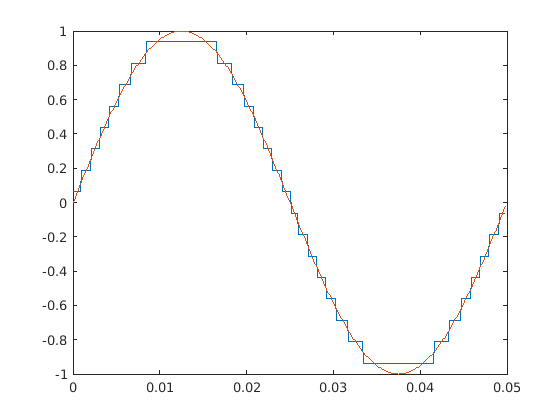

In [1]:
% Quantizacao_basica.m
clc; clear all;close all;
%% Parâmetros
fs=8000;                                            % Frequência de amostragem
Ts=1/fs;                                            % Período de amostragem
fm=20;                                              % Frequência da onda
Tm=1/fm;                                            % Período de amostragem
t=0:Ts:Tm-Ts;                                       % Eixo do tempo
x=sin(2*pi*20*t);                                   % Sinal x(t)
L=16;                                               % Níveis de quantização
nbits=log2(L);                                      % Pode-se representar com 4 bits

%% Quantização com round()
sig_max=max(x);                                     % Encontra pico máximo
sig_min=min(x);                                     % Encontra pico mínimo
Delta=(sig_max-sig_min)/L;                          % Intervalo de quantização (distância entre um nível e outro)
q_level=sig_min+Delta/2:Delta:sig_max-Delta/2;      % Vetor com os Q níveis (Ex: nível 4 -- q_level(4)= -0.05V)

% Etapas para usar o round()
sigp=x-sig_min;                                     % Joga sinal pra cima
sigp=sigp*(1/Delta);                                % Dá ganho de 1/Delta no sinal (elementos >= 0)
sigp=sigp+1/2;                                      % Tira elementos do zero 
% Agora que nenhum valor do sinal agora é zero nem negativo:
qindex=round(sigp);                                 % Encontra inteiro mais proximo para cada elemento
qindex=min(qindex,L);                               % Trunca o excedente de qindex (Ex: nível 17)
q_out=q_level(qindex);                              % Distribui nos níveis cada elemento

%% Plotting
plot (t,q_out,t,x)

Conhecida as etapas de quantização, faremos agora a quantização do sinal amostrado de Amostragem.mat, concluindo mais uma etapa do PCM. Faremos a quantização do sinal exatamente como fizemos para senóide anterior.

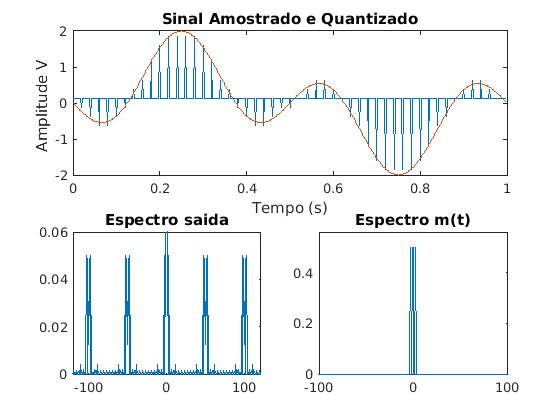

In [4]:
% Quantizacao.m
close all; clear all; clc;
%% Parâmetros
% Coletaremos todos os dados do processo de amostragem para que o código
% não fique extenso. Todas as variáveis terão o mesmo nome. O arquivo .mat
% deve sempre está na pasta em que o script está.
load('handsOn7_matlab_codes/Amostragem.mat')

%% Quantização
sig_max=max(s_out);                                         % Encontra pico máximo
sig_min=min(s_out);                                         % Encontra pico mínimo
Delta=(sig_max-sig_min)/L;                                  % Intervalo de quantização (distância entre um nível e outro)
q_level=sig_min+Delta/2:Delta:sig_max-Delta/2;              % Vetor com os Q níveis (Ex: nível 4 -- q_level(4)= -0.05V)

% Etapas para usar o round()
sigp=s_out-sig_min;                                         % Joga sinal pra cima
sigp=sigp*(1/Delta);                                        % Dá ganho de 1/Delta no sinal
sigp=sigp+1/2;                                              % Tira elementos do zero 
% Agora que nenhum valor do sinal agora é zero nem negativo:
qindex=round(sigp);                                         % Encontra inteiro mais proximo para cada elemento
qindex=min(qindex,L);                                       % Remove o excedente de qindex (Ex: nível 17)
q_out=q_level(qindex);                                      % Distribui nos níveis cada elemento

%% Espectro
lfft=length(q_out);                                         % Comprimento da fft
Q_out=fftshift(fft(q_out,lfft)/lfft);                       % Sinal s_out na frequência
%Freq ja vem no load

%% Plotting
% Plot do sinal no tempo
subplot(2,2,[1 2])
plot(t,q_out)
hold on
plot(t,m_t)
title('Sinal Amostrado e Quantizado');
xlabel('Tempo (s)');
ylabel('Amplitude V ');

% Plot do sinal na frequência
subplot(2,2,3)
plot(freq,abs(Q_out))
title('Espectro saida');
axis([-120 120 0 0.06])
subplot(2,2,4)
plot(freq,abs(M_f))
title('Espectro m(t)');
axis([-100 100 0 0.56])

Como se pode ver, houve um erro claro referente a aproximação do sinal amostrado e quantizado com a onda original (picos além da amplitude correta), esse erro chamamos de "Erro de quantização".


###  Erro de quantização :
Na transformação  Analógico $\rightarrow $  Digital usando um número $n$ de bits resulta na limitação da amplitude do sinal em $2^{n}$ níveis de amplitude a serem representados. No receptor, para cada intervalo é recuperado um valor de sinal que corresponde ao valor médio de um intervalo de quantização (nível de quantização). Isto resulta em pequenos desvios em relação a amostra original do sinal. O desvio corresponde, no máximo, a meio intervalo para cada amostra, sendo denominado erro de quantização.

$$ - \frac{\Delta}{2} \leq \varepsilon \leq \frac{\Delta}{2} $$

O gráfico abaixo representa a aproximação de uma senóide em todos seus pontos para $n=3$ bits gerando $L=2^{3}=8$ níveis de quantização. (Quantizacao_sen_demo.m)
![Figura01](./handsOn7_matlab_figs/Quantizacao.jpg)

Quanto maior for o número de bits, melhor será a aproximação feita, ou seja menor o Erro/Ruido de Quantização. Mas a utilização de uma maior quantidade de níveis de quantização implica na necessidade de maior quantidade de bits para representar cada amostra digitalmente, isso significa maior necessidade de banda. A relação sinal/ruído de quantização (S/N) será a razão entre o valor eficaz da amplitude do sinal e o valor eficaz do erro introduzido.
$$ (\frac{S}{N})=20 \cdot log(\frac{\left |sig  \right|}{\left |sig - sig_{quant}  \right|})$$

Pode-se ver que relação sinal/ruido será maior (melhor) para maiores valores de amplitude e menor (pior) para menores valores de amplitude. 
Deve-se estar claro aqui a diferença entre ruido de quantização e o ruido referente ao meio de propagação!

Para o sinal amostrado e quantizado que trabalhamos nos tópicos anteriores, calcularemos a SQNR do sinal amostrado aplicando a fórmula:

In [ ]:
% SQNR_PCM.m
clc; clear all; close all;
%% Parâmetros
load('handsOn7_matlab_codes/Quantizacao.mat')                       % Recupera dados de Quantização.mat
SQNR=20*log10(norm(s_out)/norm(s_out-q_out))                        % Valor atual de SQNR


SQNR =

    8.3979



### Reconstrução do sinal amostrado e quantizado
Faremos o mesmo processo de reconstrução do sinal mostrado anteriormente, criamos um filtro com banda compatível e multiplicamos na frequência (ou convoluimos no tempo):

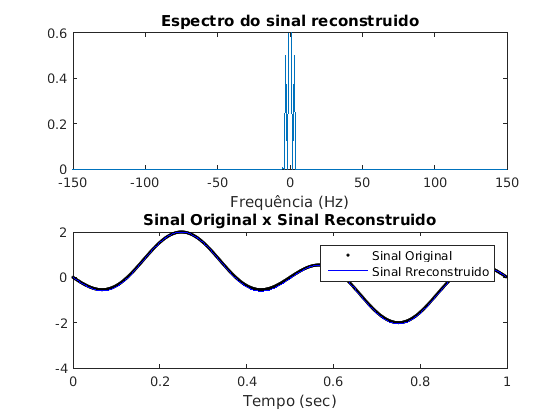

In [5]:
% Rec_quan_FPB.m
clc; clear all; close all;
%% Parâmetros
load('handsOn7_matlab_codes/Quantizacao.mat')                       % Recupera dados de Quantização.mat

%% Reconstrução via filtro passa baixa
% Largura máxima de banda do filtro é dada por Bw = floor((lfft/N_samp)/2);
Fmax=1/(2*T);                                                   % Frequência máxima dada por Fs/2
BW=5;                                                           % Largura de banda
% Filtro
H_lpf=zeros(1,lfft);                                            % Zera vetor filtro
H_lpf(lfft/2-BW:lfft/2+BW-1)=1;                                 % Define 1 na frequencia desejada
S_recv=N_samp*Q_out.*H_lpf;                                     % Filtragem ideal
s_recv=real(ifft(fftshift(S_recv)));                            % Reconstroi o sinal no tempo
s_recv=s_recv(1:lfft);                                          % Corrige número de elementos 
s_recv=s_recv-s_recv(1);                                         % Remove quaisquer componente DC
s_recv=s_recv*(max(m_t)/max(s_recv));                           % Dá ganho pro sinal reconstruido

%% Plotting
% Plota o sinal reconstruído por um filtro passa baixa ideal no domínio da frequência
% Plota sinal recuperado na frequência
subplot(2, 1, 1);
sfig2a=plot(freq,abs(S_recv));
xlabel('Frequência (Hz)');
axis([-150 150 0 .6]);
title('Espectro do sinal reconstruido');

% Plota sinal recuperado no tempo
subplot(2, 1, 2);
plot(t,m_t,'k.',t,s_recv(1:lfft),'b');
legend('Sinal Original','Sinal Rreconstruido');
xlabel('Tempo (sec)');
title('Sinal Original x Sinal Reconstruido');

### Codificação PCM
Dentre as diversas formas de codificação de linha, trataremos da mais básica conhecida como **On-Off**, a qual transmite 1 quando o pulso é positivo, e 0 na ausência de pulso. Em matlab, a função utilizada foi de2bin (Decimal-to-Binary) e bi2de (Binary-to-Decimal).

In [3]:
de2bi([20])


ans =

     0     0     1     0     1



Deve-se notar que o número "00101" não é 20 em binário. A função retorna o número do bit menos significativo para o mais significativo. Então o número 20 binário é dado por "10100" exatamente a sequência contrária da função de2bi. Entretanto isso não fará a menor diferença se só quisermos usar a função e em seguida decodificar o número com bi2de (será nosso caso, pois não interessa a sequência e sim a informação). Caso queira corrigir, só usar a função de2bi(numero , 'left-msb').

In [2]:
bi2de([0 0 1 0 1])


ans =

    20



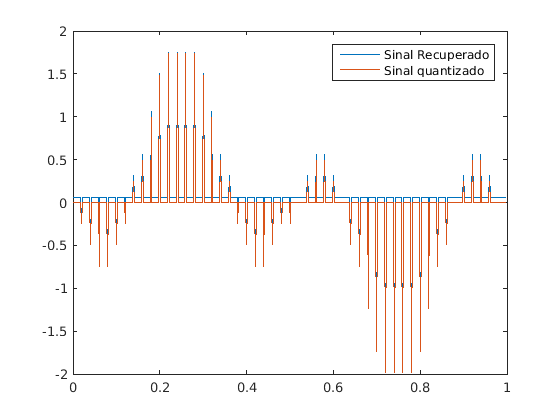

In [1]:
% Code_Quan.m
clc; clear all;close all;
%% Parâmetros
load('Quantizacao.mat');

%% Codificador binário
% Colocando números em inteiros e positivos 
sig_quan=q_out*L;                                   % Coloca números inteiros
sig_quan= sig_quan-min(sig_quan)+1;                 % Todos elementos positivos
sig_quan= round(sig_quan);                          % Caso haja erros, regenera sinal perfeitamente pra inteiros
vet_bin = de2bi(sig_quan);                          % Codificando sinal 

%% Decodificador de binário
vet_dec_rec = bi2de(vet_bin);                       % Transforma sinal para decimal novamente
revert = vet_dec_rec/L-2;                           % Desfaz os ajustes da codificação
plot (t, revert,t,q_out)
legend('Sinal Recuperado','Sinal quantizado')

O sinal decodificado está claramente deslocado (Componente DC) devido a alguns ajustes e a função round, porém isso não é problema pois este sinal ainda passará pelo processo de filtragem que eliminará esta componente.

### Multiplexação e demultiplexação (TDM)
Vários sinais de baixa taxa de bits podem ser multiplexados ou combinados para formar um sinal a uma taxa de bits mais elevada para poder ser transmitido em alta frequência por divisão no tempo. Esse processo de transmissão de dados dividindo o tempo chama-se Multiplexação. Há basicamente duas formas de multiplexar dois ou mais sinais no tempo.
- Enlaçamento de bits: Alterna-se sequencialmente os bits de cada sinal. 
- Enlaçamento de palavras: Alterna-se sequencialmente um grupo de "N" bits.

Na multiplexação é estabelecida a distância entre uma amostra de N bits e a amostra do sinal sinal subsequênte. 
Nesse HandsOn faremos a multiplexação de dois sinais em binário simulando uma transmissão e recepção sem perdas nem ruídos.

In [3]:
clc; clear all;close all;
%% Parâmetros dos sinais
t=0:0.01:10;
f1=0.5;
f2=0.2;
sinal01=10*cos(2*pi*f1*t);
sinal02=10*cos(2*pi*f2*t);

%% Codificador de sinais
% Ajustando sinal 01
sig_quan01= sinal01-min(sinal01)+1;                     % Todos elementos positivos
sig_quan01= round(sig_quan01);                          % Transforma sinal em números inteiros
sig_code01= de2bi (sig_quan01);                         % Transforma em sinal binário 
% Ajustando sinal 02
sig_quan02= sinal02-min(sinal02)+1;                     % Todos elementos positivos
sig_quan02= round(sig_quan02);                          % Transforma sinal em números inteiros
sig_code02= de2bi (sig_quan02);                         % Transforma em sinal binário 

%% Multiplexador de sinais
Zero= zeros(1,5);
for i=1:1:1000
    
mux_sig(4*(i-1)+1,:)    =   sig_code01(i,:);
mux_sig(4*(i-1)+2,:)    =   Zero;
mux_sig(4*(i-1)+3,:)    =   sig_code02(i,:);
mux_sig(4*(i-1)+4,:)    =   Zero;

end

%% Demultiplexação
demux_01 = [];
demux_02 = [];

for i=1:1000
demux_01 (i,:)= mux_sig((i-1)*4 + 1,:);
demux_02 (i,:)= mux_sig((i-1)*4 + 3,:);
end

sig_rec01 = bi2de(demux_01);
sig_rec02 = bi2de(demux_02);

Montar um Mux como este parece complicado mas pode ser entendido quando cada parte quando se se processa passo a passo sem laço nenhum. Por exemplo: $ mux sig(4*(i-1)+1,:)  $  porque o uso de "$4$" , "$(i-1)$" e "$+1$".
Todo laço (for) primeiramente deve ser pensado como uma repetição de contas variando apenas um componente.

No nosso caso, nós queriamos que a cada 4 palavras (conjunto de 5 bits), a primeira fosse do sinal 1. Por extenso faríamos:


In [ ]:
%% Não Compilar !
% Loop 1
mux_sig(1,:)    =   sig_code01(1,:);
mux_sig(2,:)    =   Zeros; 
mux_sig(3,:)    =   sig_code02(1,:);
mux_sig(4,:)    =   Zeros;

% Loop 2
mux_sig(5,:)    =   sig_code01(2,:);
mux_sig(6,:)    =   Zeros; 
mux_sig(7,:)    =   sig_code02(2,:);
mux_sig(8,:)    =   Zeros;

% Loop 2
mux_sig(9,:)    =   sig_code01(3,:);
mux_sig(10,:)   =   Zeros; 
mux_sig(11,:)   =   sig_code02(3,:);
mux_sig(12,:)   =   Zeros;

E assim sucessivamente. Com isso percebemos de cara que a cada loop, sig_code varia como (1,2,3...) elemento. 
Já na primeira linha, mux_sig, varia em (1 , 5, 9 ,13 , 17, ... ).Isso é um equação linear descrita da forma:
$$ y = 4i-3 $$
Em outras palavras

$$ y = 4(i-1)+1 $$
Isso pra primeira linha. Porém para as linhas seguintes será a mesma equação somando $1$.

A demutiplexação segue no mesmo princípio.

## Desafio:

Desejamos montar uma estação central para o monitoramento simultâneo de eletrocardiograma de 5 pacientes hospitalizados. Os dados dos 5 pacientes são levados ao centro de processamento, são amostrados, quantizados, codificados para binário e multiplexados por divisão no tempo. Os dados multiplexados são, então transmitido à estação de monitoramento em PCM via rádio. A largura de banda do sinal é de 100Hz. O máximo de erro aceitável  em amplitudes de amostras é de 0,25% da amplitude de pico do sinal. A taxa de amostragem deve ser pelo menos o dobro da taxa de Nyquist. 

